# Build an AR Predictive Time Series Model for Larcenies

import python modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

set figure size

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Load the data and clean

read the raw data set from CSV file

In [3]:
df = pd.read_csv("APD_Public_Incident_Data__Crime_Locations.csv")

In [4]:
print("number of columns {}".format(len(df.columns)))
print("number of rows {}".format(df['OBJECTID'].count()))

number of columns 17
number of rows 99306


In [5]:
df['incident_dt'] = pd.to_datetime(df['date_occurred'])

In [6]:
df.index = df['incident_dt']

# Larceny theft over time

Definition. The FBI's Uniform Crime Reporting (UCR) Program defines larceny-theft as the unlawful taking, carrying, leading, or riding away of property from the possession or constructive possession of another.

In [7]:
larceny_incidents = df[df['offense_group_short_description'] == 'LARCENY - THEFT']

In [8]:
larceny_incidents['incident_dt'].count()

27657

lets roll up the events up by month and study the pattern over time

In [9]:
larceny_monthly_counts = larceny_incidents['offense_short_description'].resample('M').count()

In [10]:
larceny_monthly_counts.head()

incident_dt
2005-01-31    173
2005-02-28    157
2005-03-31    157
2005-04-30    182
2005-05-31    189
Freq: M, Name: offense_short_description, dtype: int64

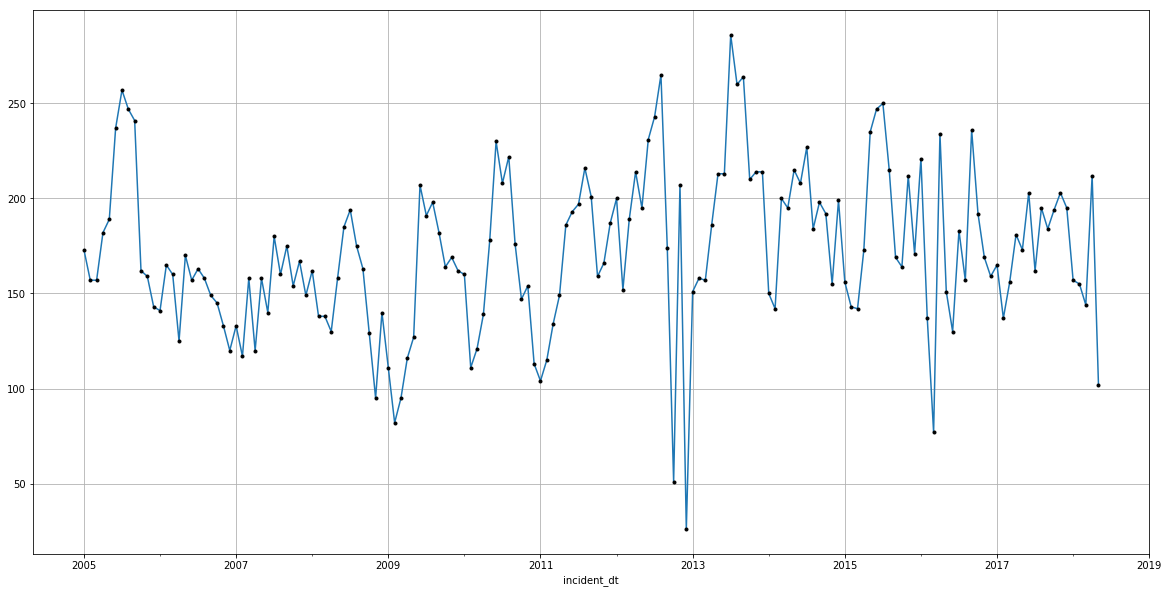

In [11]:
larceny_monthly_counts.plot()
larceny_monthly_counts.plot(style='k.', grid=True)

# Model the data with an *AR* time series analysis

lets build an AR model

https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [12]:
start = datetime.datetime.now()
print(datetime.datetime.now() - start)

0:00:00.000037


In [13]:
series = larceny_monthly_counts

In [14]:
# split dataset
X = series.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
# print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
# plot results


Lag: 13
predicted=160.515879, expected=156.000000
Test RMSE: 35.753
predicted=171.999195, expected=143.000000
Test RMSE: 35.753
predicted=185.388921, expected=142.000000
Test RMSE: 35.753
predicted=172.573411, expected=173.000000
Test RMSE: 35.753
predicted=193.050492, expected=235.000000
Test RMSE: 35.753
predicted=185.732860, expected=247.000000
Test RMSE: 35.753
predicted=184.692177, expected=250.000000
Test RMSE: 35.753
predicted=186.997199, expected=215.000000
Test RMSE: 35.753
predicted=172.457606, expected=169.000000
Test RMSE: 35.753
predicted=177.255368, expected=164.000000
Test RMSE: 35.753
predicted=168.866460, expected=212.000000
Test RMSE: 35.753
predicted=168.737864, expected=171.000000
Test RMSE: 35.753
predicted=166.937933, expected=221.000000
Test RMSE: 35.753
predicted=166.902711, expected=137.000000
Test RMSE: 35.753
predicted=170.597526, expected=77.000000
Test RMSE: 35.753
predicted=171.340473, expected=234.000000
Test RMSE: 35.753
predicted=174.960617, expected=15

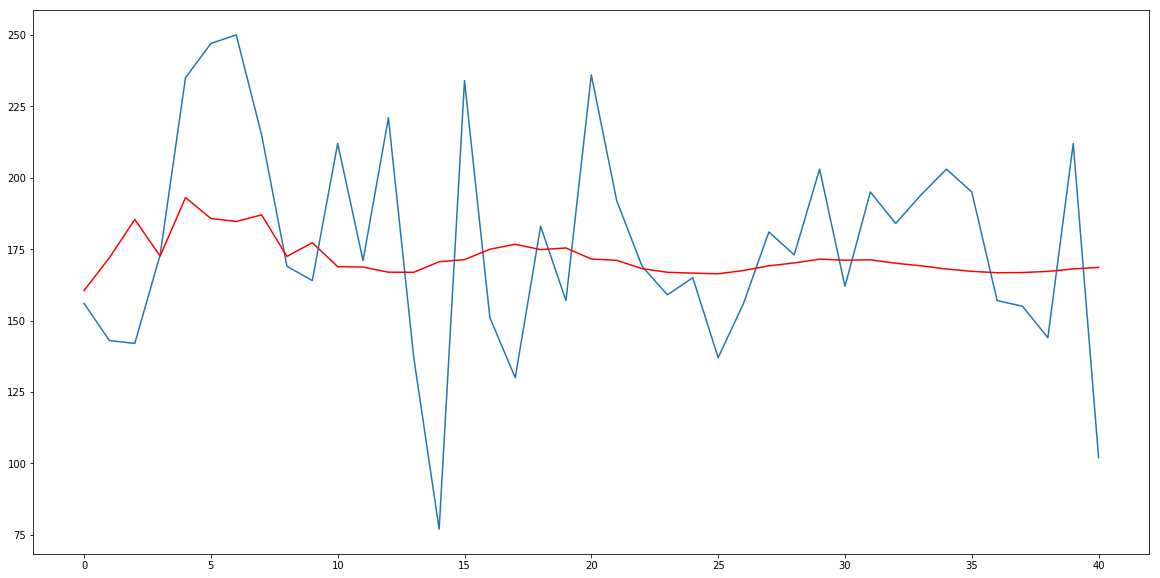

In [15]:
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()
